In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from datetime import datetime

Задача: Нужно проверить статистические гипотезы о значимости признаков feature1 и feature2  
(понять дают ли эти признаки какую-либо информацию для целевой переменной).

In [2]:
df = pd.read_csv('test_Feb22.csv', index_col=0, parse_dates=['time'])

In [3]:
df.head()

,time,user_id,type,amount,target,feature1,feature2,events_ordinal_number,second_event_time,loan_ordinal_number,events_time_diff,previous_loans_max_amount
0,2001-01-01 00:00:00,114,loanRequest,14651,NaN,1,1,1,2001-01-25 05:00:00,1,NaN,NaN
1,2001-01-01 01:00:00,199,loanRequest,13398,NaN,0,0,1,2001-01-08 01:00:00,1,NaN,NaN
2,2001-01-01 02:00:00,717,loanRequest,14525,NaN,0,0,1,2001-01-09 16:00:00,1,NaN,NaN
3,2001-01-01 03:00:00,66,loan,14437,1.0,1,1,1,2001-03-27 17:00:00,1,NaN,NaN
4,2001-01-01 04:00:00,584,loanRequest,15861,NaN,1,0,1,2001-01-05 10:00:00,1,NaN,NaN


<AxesSubplot:>

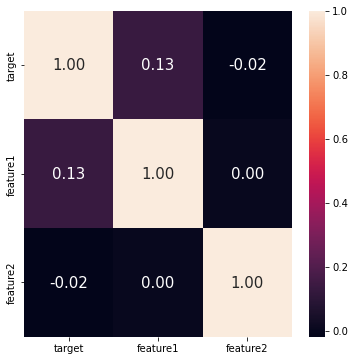

In [6]:
# Посмотрим на корреляцию данных
df_test = df[['target', 'feature1', 'feature2']].copy()
df_test = df_test.fillna(0).astype('int')
corr = df_test.corr()
fig = plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, annot_kws={'size':15}, fmt='.2f')

In [5]:
# Есть слабая корреляция (0,13) между признаком feature1 и целевой переменной target

#### Статистический анализ значимости для признака feature1 и целевой переменной target

In [6]:
# Построим таблицу сопряженности значений для признака feature1 и целевой переменной target
crosstable1 = pd.crosstab(df_test.target, df_test.feature1, margins=True)
crosstable1

feature1,0,1,All
target,,,
0,3782,5170,8952
1,218,830,1048
All,4000,6000,10000


In [7]:
# Условия статистического теста:
# Ho - гипотеза о том, что распределение не отличаются от ожидаемого (т.е. две переменные независимы между собой)
# Н1 - гипотеза о том, что распределение отличаются от ожидаемого (т.е. две переменные зависимы между собой)
# Уровень значимости принимаем 0,05

In [8]:
# Построим таблицу сопряженности ожидаемых значений для признака feature1 и целевой переменной target
crosstable1_norm = crosstable1.copy()
perc_target_0 = crosstable1.loc['All', 0] / crosstable1.loc['All', 'All']
perc_target_1 = crosstable1.loc['All', 1] / crosstable1.loc['All', 'All']
crosstable1_norm.loc[[0, 1], 0] = crosstable1_norm.loc[[0, 1], 'All'] * perc_target_0
crosstable1_norm.loc[[0, 1], 1] = crosstable1_norm.loc[[0, 1], 'All'] * perc_target_1 
crosstable1_norm

feature1,0,1,All
target,,,
0,3580.8,5371.2,8952
1,419.2,628.8,1048
All,4000.0,6000.0,10000


In [9]:
# Расчитаем значения Хи-квадрат
X_2 = ((crosstable1.iloc[0:2,0:2] - crosstable1_norm.iloc[0:2,0:2])**2 / crosstable1_norm.iloc[0:2,0:2]).sum().sum()
X_2

179.78909854536607

In [10]:
# Рассчитаем степени свободы
n = 1 # (строки-1)*(столбцы-1) = (2-1)*(2-1) = 1

In [11]:
# Табличное критическое значение Хи-квадрат при уровне значимости 0.05 и n=1 равняется 3.841
X_2_table = 3.841

In [12]:
X_2 >= X_2_table

True

In [13]:
# Следовательно, у нас есть основания отклонить Но гипотезу и принять альтернативную Н1
# Т.о. зависимость м/д признаком feature1 и целевой переменной target статистически значима, при уровне значимости 0.05.

In [14]:
# Расчет при помощи библиотеки scipy
chi2_contingency(crosstable1.iloc[0:2,0:2], correction=False)

(179.78909854536604,
 5.388511407777178e-41,
 1,
 array([[3580.8, 5371.2],
        [ 419.2,  628.8]]))

In [15]:
# Получаем такие же результаты. 
# Так же видим, что р = 5.388511407777178e-41 < 0.05, что позволяет отклонить Но гипотезу

#### Статистический анализ значимости для признака feature2 и целевой переменной target

In [16]:
# Построим таблицу сопряженности значений для признака feature2 и целевой переменной target
crosstable2 = pd.crosstab(df_test.target, df_test.feature2, margins=True)
crosstable2

feature2,0,1,All
target,,,
0,4446,4506,8952
1,554,494,1048
All,5000,5000,10000


In [17]:
# Условия статистического теста:
# Ho - гипотеза о том, что распределение не отличаются от ожидаемого (т.е. две переменные независимы между собой)
# Н1 - гипотеза о том, что распределение отличаются от ожидаемого (т.е. две переменные зависимы между собой)
# Уровень значимости принимаем 0,05

In [18]:
# Построим таблицу сопряженности ожидаемых значений для признака feature2 и целевой переменной target
crosstable2_norm = crosstable2.copy()
perc_target_0 = crosstable2.loc['All', 0] / crosstable2.loc['All', 'All']
perc_target_1 = crosstable2.loc['All', 1] / crosstable2.loc['All', 'All']
crosstable2_norm.loc[[0, 1], 0] = crosstable2_norm.loc[[0, 1], 'All'] * perc_target_0
crosstable2_norm.loc[[0, 1], 1] = crosstable2_norm.loc[[0, 1], 'All'] * perc_target_1 
crosstable2_norm

feature2,0,1,All
target,,,
0,4476.0,4476.0,8952
1,524.0,524.0,1048
All,5000.0,5000.0,10000


In [19]:
# Рассчитаем значения Хи-квадрат
X_2 = ((crosstable2.iloc[0:2,0:2] - crosstable2_norm.iloc[0:2,0:2])**2 / crosstable2_norm.iloc[0:2,0:2]).sum().sum()
X_2

3.8372592759347564

In [20]:
# Рассчитаем степени свободы
n = 1 # (строки-1)*(столбцы-1) = (2-1)*(2-1) = 1

In [21]:
# Табличное критическое значение Хи-квадрат при уровне значимости 0.05 и n=1 равно 3.841
X_2_table = 3.841

In [22]:
X_2 >= X_2_table

False

In [23]:
# Следовательно, у нас нет оснований отклонить Но гипотезу
# Т.о. отсутствует статистически значимая зависимость м/д признаком feature2 и целевой переменной target отсутствует, при уровне значимости 0.05.

In [24]:
# Расчет при помощи библиотеки scipy
chi2_contingency(crosstable2.iloc[0:2,0:2], correction=False)

(3.8372592759347564,
 0.05012539402106109,
 1,
 array([[4476., 4476.],
        [ 524.,  524.]]))

In [25]:
# Получаем такие же результаты. 
# Так же видим, что р = 0.05012539402106109 > 0.05, что не позволяет отклонить Но гипотезу